In [1]:
reset -fs

# Classification

### Preprocessing

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn, warnings 
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, confusion_matrix
from IPython.core.display import HTML
HTML("<style>.container { width:95% !important; }</style>")
warnings.filterwarnings('ignore')
%matplotlib inline 

In [4]:
df_labeled = pd.read_csv('data/labeled_df.csv', na_values=['?'])
df_labeled.head()

,boolean_relationship,all_info,chemical_name,disease_name
0,True,describe yearold woman preexisting mitral valv...,caffeine,ventricular fibrillation
1,False,laxation critically ill patients lactulose pol...,lactulose,critically ill
2,False,methotrexate mtx sulfasalazine ssz cyclosporin...,sulfasalazine/SSZ,PsA
3,True,polychlorinated biphenyls pcbs persistent envi...,Polychlorinated biphenyls/PCBs,NAFLD/non-alcoholic fatty liver disease
4,True,although pcp classified human carcinogen epide...,PCP,sarcoma


In [6]:
y = df_labeled.boolean_relationship
X = df_labeled.all_info

### Vectorize

#### Finding the optimal number of features. We will solve the following as a Explore then exploit Multi-armed bandit problem. 

In [4]:
for features in [100,1000,3000,5800,6000,7000,7300,7500,7800,8000]:
    tf_idf = TfidfVectorizer(analyzer='word', stop_words='english',max_features=features)
    X_tf = tf_idf.fit_transform(X).toarray()    
    X_tr, X_te, y_tr, y_te = train_test_split(X_tf, y, random_state=1)
    mnb = MultinomialNB()
    mnb.fit(X_tr, y_tr)
    print('Accuracy of %f:' %features, mnb.score(X_te, y_te))
    

Accuracy of 100.000000: 0.701244813278
Accuracy of 1000.000000: 0.740663900415
Accuracy of 3000.000000: 0.759336099585
Accuracy of 5800.000000: 0.759336099585
Accuracy of 6000.000000: 0.763485477178
Accuracy of 7000.000000: 0.767634854772
Accuracy of 7300.000000: 0.767634854772
Accuracy of 7500.000000: 0.769709543568
Accuracy of 7800.000000: 0.769709543568
Accuracy of 8000.000000: 0.765560165975


In [5]:
#finding the optimal number of features 
X = df_labeled.all_info
for features in [100,1000,3000,5800,6000,7000,7300,7500,7800,8000]:
    tf_idf = TfidfVectorizer(analyzer='word', stop_words='english',max_features=features, sublinear_tf=True)
    X_tf = tf_idf.fit_transform(X).toarray()    
    X_tr, X_te, y_tr, y_te = train_test_split(X_tf, y, random_state=1)
    mnb = MultinomialNB()
    mnb.fit(X_tr, y_tr)
    print('Accuracy of %f:' %features, mnb.score(X_te, y_te))
    

Accuracy of 100.000000: 0.697095435685
Accuracy of 1000.000000: 0.740663900415
Accuracy of 3000.000000: 0.765560165975
Accuracy of 5800.000000: 0.759336099585
Accuracy of 6000.000000: 0.761410788382
Accuracy of 7000.000000: 0.761410788382
Accuracy of 7300.000000: 0.761410788382
Accuracy of 7500.000000: 0.761410788382
Accuracy of 7800.000000: 0.761410788382
Accuracy of 8000.000000: 0.761410788382


In [6]:
#finding the optimal number of features 
X = df_labeled.all_info
for features in [100,1000,3000,5800,6000,7000,7300,7500,7800,8000]:
    tf_idf = TfidfVectorizer(analyzer='word', stop_words='english',max_features=features, smooth_idf = False, sublinear_tf=True)
    X_tf = tf_idf.fit_transform(X).toarray()    
    X_tr, X_te, y_tr, y_te = train_test_split(X_tf, y, random_state=1)
    mnb = MultinomialNB()
    mnb.fit(X_tr, y_tr)
    print('Accuracy of %f:' %features, mnb.score(X_te, y_te))
    

Accuracy of 100.000000: 0.697095435685
Accuracy of 1000.000000: 0.740663900415
Accuracy of 3000.000000: 0.765560165975
Accuracy of 5800.000000: 0.757261410788
Accuracy of 6000.000000: 0.759336099585
Accuracy of 7000.000000: 0.759336099585
Accuracy of 7300.000000: 0.761410788382
Accuracy of 7500.000000: 0.761410788382
Accuracy of 7800.000000: 0.761410788382
Accuracy of 8000.000000: 0.761410788382


In [7]:
#finding the optimal number of features 
X = df_labeled.all_info
for features in [100,1000,3000,5800,6000,7000,7300,7500,7800,8000]:
    tf_idf = TfidfVectorizer(analyzer='word', stop_words='english',max_features=features, smooth_idf = False, sublinear_tf=True)
    X_tf = tf_idf.fit_transform(X).toarray()    
    X_tr, X_te, y_tr, y_te = train_test_split(X_tf, y, random_state=1)
    mnb = MultinomialNB()
    mnb.fit(X_tr, y_tr)
    print('Accuracy of %f:' %features, mnb.score(X_te, y_te))
    

Accuracy of 100.000000: 0.697095435685
Accuracy of 1000.000000: 0.740663900415
Accuracy of 3000.000000: 0.765560165975
Accuracy of 5800.000000: 0.757261410788
Accuracy of 6000.000000: 0.759336099585
Accuracy of 7000.000000: 0.759336099585
Accuracy of 7300.000000: 0.761410788382
Accuracy of 7500.000000: 0.761410788382
Accuracy of 7800.000000: 0.761410788382
Accuracy of 8000.000000: 0.761410788382


** We will use: **7500 features with default settings

In [7]:
#Try out different vectorizers:  
vectorizer = CountVectorizer(analyzer = "word",   
                             stop_words = 'english',   
                             max_features = 7500)
tfidf = TfidfVectorizer(analyzer='word', 
                        stop_words='english', 
                        max_features=7500)

In [8]:
# fit the model and learns the vocabulary; and transform training data into feature vectors. 

#COUNT VECTORIZER
X0 = vectorizer.fit_transform(X).toarray()
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y, random_state=1)

#TF-IDF VECTORIZER (normalizes the vocabulary)
X = tfidf.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Naive Bayes 

#### Comparing results of CountVectorizer and TFIDFVectorizer

In [10]:
bnb = BernoulliNB()
bnb.fit(X_train0, y_train0)
print('Count Accuracy: %.2f%%' %(bnb.score(X_test0, y_test0)*100))

bnb.fit(X_train, y_train)
print('TF-IDF Accuracy: %.2f%%' %(bnb.score(X_test, y_test)*100))

Count Accuracy: 74.48%
TF-IDF Accuracy: 74.48%


In [11]:
mnb = MultinomialNB()
mnb.fit(X_train0, y_train0)
print('Count Accuracy: %.2f%%' %(mnb.score(X_test0, y_test0)*100))

mnb.fit(X_train, y_train)
print('TF-IDF Accuracy: %.2f%%' %(mnb.score(X_test, y_test)*100))

Count Accuracy: 74.27%
TF-IDF Accuracy: 76.97%


In [12]:
gnb = GaussianNB()
gnb.fit(X_train0, y_train0)
print('Count Accuracy: %.2f%%' %(gnb.score(X_test0, y_test0)*100))

gnb.fit(X_train, y_train)
print('TF-IDF Accuracy: %.2f%%' %(gnb.score(X_test, y_test)*100))

Count Accuracy: 68.26%
TF-IDF Accuracy: 68.05%


Multinomical NB had a higher accuracy than Bernoulli Naive Bayes, because my feature vectors are binary. Let us try this with other classifiers

### Try other classifiers

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train0, y_train0)
print("random forest Count Accuracy: %.2f%%" %(rf.score(X_test0, y_test0)*100))

rf.fit(X_train, y_train)
print("random forest TF-IDF Accuracy: %.2f%%" %(rf.score(X_test, y_test)*100))

random forest Count Accuracy: 72.41%
random forest TF-IDF Accuracy: 71.58%


In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train0, y_train0)
print("knn Count Accuracy: %.2f%%" %(knn.score(X_test0, y_test0)*100))

knn.fit(X_train, y_train)
print("knn TF-IDF Accuracy: %.2f%%" %(knn.score(X_test, y_test)*100))

knn Count Accuracy: 62.45%
knn TF-IDF Accuracy: 68.05%


In [15]:
log = LogisticRegression()
log.fit(X_train0, y_train0)
print("logistic Count Accuracy: %.2f%%" %(log.score(X_test0, y_test0)*100))

log.fit(X_train, y_train)
print("logistic TF-IDF Accuracy: %.2f%%" %(log.score(X_test, y_test)*100))

logistic Count Accuracy: 74.07%
logistic TF-IDF Accuracy: 76.97%


In [16]:
ada = AdaBoostClassifier()
ada.fit(X_train0, y_train0)
print("adaboost Count Accuracy: %.2f%%" %(ada.score(X_test0, y_test0)*100))

ada.fit(X_train, y_train)
print("adaboost TF-IDF Accuracy: %.2f%%" %(ada.score(X_test, y_test)*100))

adaboost Count Accuracy: 70.75%
adaboost TF-IDF Accuracy: 71.16%


In [18]:
svmSVC = svm.SVC() 
svmSVC.fit(X_train0, y_train0)
print("svmSVC Count Accuracy: %.2f%%" %(svmSVC.score(X_test0, y_test0)*100))

svmSVC.fit(X_train, y_train) 
print("svmSVC TF-IDF Accuracy: %.2f%%" %(svmSVC.score(X_test, y_test)*100),end="\n\n")

svmNuSVC = svm.NuSVC() 
svmNuSVC.fit(X_train0, y_train0)
print("svmNuSVC Count Accuracy: %.2f%%" %(svmNuSVC.score(X_test0, y_test0)*100))

svmNuSVC.fit(X_train, y_train) 
print("svmNuSVC TF-IDF Accuracy: %.2f%%" %(svmNuSVC.score(X_test, y_test)*100),end="\n\n")

svmLinear = svm.LinearSVC()
svmLinear.fit(X_train0, y_train0)
print("svmLinear Count Accuracy: %.2f%%" %(svmLinear.score(X_test0, y_test0)*100))

svmLinear.fit(X_train, y_train) 
print("svmLinear TF-IDF Accuracy: %.2f%%" %(svmLinear.score(X_test, y_test)*100))

svmSVC Count Accuracy: 69.71%
svmSVC TF-IDF Accuracy: 49.38%

svmNuSVC Count Accuracy: 74.90%
svmNuSVC TF-IDF Accuracy: 72.82%

svmLinear Count Accuracy: 72.82%
svmLinear TF-IDF Accuracy: 75.31%


Logistic Regression, Multinomial Bayes, and svmLinear seem to outperform the other classifiers with TF-IDF. We will tune their hyperparameters...

### Tune hyperparameters

#### Multinomial Bayes

In [10]:
mnb_grid = {'alpha': list(np.arange(0.1,1.1,0.01)),
            'fit_prior': [True, False],
            }

mnb_gridsearch = GridSearchCV(MultinomialNB(),
                             mnb_grid,
                             n_jobs=-1,
                             cv=5,
                             scoring='f1_weighted')
mnb_gridsearch.fit(X_train, y_train)

print("best parameters:", mnb_gridsearch.best_params_)

best_mnb_model = mnb_gridsearch.best_estimator_

best parameters: {'alpha': 1.0099999999999996, 'fit_prior': True}


In [27]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print('MultinomialNB accuracy before tuning: %.2f%%' %(mnb.score(X_test, y_test)*100))

MultinomialNB accuracy before tuning: 76.97%


In [11]:
mnb = MultinomialNB(fit_prior=True,alpha=1.0)
mnb.fit(X_train, y_train)
print('MultinomialNB accuracy after tuning: %.2f%%' %(mnb.score(X_test, y_test)*100))

MultinomialNB accuracy after tuning: 76.97%


It is strange because the accuracy decreased after tuning the parameters. 

#### Logistic Regression

In [12]:
log_grid = {'penalty': ['l1','l2'],
            'C': list(np.arange(0.1,1.1,0.01)),
            'fit_intercept': [True, False]
            }

log_gridsearch = GridSearchCV(LogisticRegression(),
                             log_grid,
                             n_jobs=-1,
                             cv=5,
                             scoring='f1_weighted')
log_gridsearch.fit(X_train, y_train)

print("best parameters:", log_gridsearch.best_params_)

best_log_model = log_gridsearch.best_estimator_

best parameters: {'fit_intercept': True, 'penalty': 'l2', 'C': 0.49999999999999978}


In [13]:
log_grid = {'penalty': ['l2'],
            'C': list(np.arange(0.1,1.1,0.01)),
            'fit_intercept': [True, False],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']
            }

log_gridsearch = GridSearchCV(LogisticRegression(),
                             log_grid,
                             n_jobs=-1,
                             cv=5,
                             scoring='f1_weighted')
log_gridsearch.fit(X_train, y_train)

print("best parameters:", log_gridsearch.best_params_)

best_log_model = log_gridsearch.best_estimator_

best parameters: {'fit_intercept': True, 'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.48999999999999977}


In [14]:
log = LogisticRegression()
log.fit(X_train, y_train)
print("logistic accuracy before tuning: %.2f%%" %(log.score(X_test, y_test)*100))

logistic accuracy before tuning: 76.97%


In [15]:
log = LogisticRegression(fit_intercept=True, solver='newton-cg',C=0.48999999999999977, penalty='l2')
log.fit(X_train, y_train)
print("logistic accuracy after tuning: %.2f%%" %(log.score(X_test, y_test)*100))

logistic accuracy after tuning: 77.39%


#### LinearSVC

In [26]:
svm_grid = {'C': list(np.linspace(.001,1000, endpoint=True)),
            #'loss': ['hinge','squared_hinge'], 
            #'penalty': ['l1'],
            'dual': [True, False],
            'multi_class': ['ovr','crammer_singer'],
            'fit_intercept':[True, False],
            'class_weight':[None,'balanced']
            }

svm_gridsearch = GridSearchCV(svm.LinearSVC(),
                             svm_grid,
                             n_jobs=-1,
                             cv=5,
                             scoring='f1_weighted')
svm_gridsearch.fit(X_train, y_train)

print("best parameters:", svm_gridsearch.best_params_)

best_svm_model = svm_gridsearch.best_estimator_

best parameters: {'dual': True, 'fit_intercept': False, 'C': 0.001, 'class_weight': 'balanced', 'multi_class': 'ovr'}


In [27]:
svmLinear = svm.LinearSVC()
svmLinear.fit(X_train, y_train) 
print("svmLinear accuracy before tuning: %.2f%%" %(svmLinear.score(X_test, y_test)*100))

svmLinear accuracy before tuning: 75.52%


In [28]:
svmLinear = svm.LinearSVC(dual=True, fit_intercept=False,C=0.001, class_weight='balanced', multi_class='ovr')
svmLinear.fit(X_train, y_train) 
print("svmLinear accuracy after tuning: %.2f%%" %(svmLinear.score(X_test, y_test)*100))

svmLinear accuracy after tuning: 76.76%


Logistic Regression gives us the most accurate predictions, because it puts weights on the most unique features, unlike Multinomial Bayes, which assumes that all features are independent.  

### Roc Curve

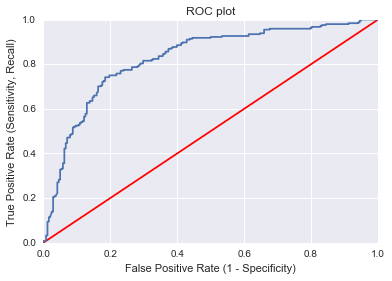

In [45]:
predictions = log.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_score=predictions, y_true=y_test)

x = [0.0,1.0]
plt.plot(x,x, color = 'red')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot")
plt.show()

### Confusion Matrix

In [47]:
cm = confusion_matrix(y_test, log.predict(X_test))
print(cm)

[[195  43]
 [ 68 176]]


In [48]:
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(normalized_cm)

[[ 0.81932773  0.18067227]
 [ 0.27868852  0.72131148]]


In [31]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.xticks(2, ('True', 'False'), rotation=45)
    #plt.yticks(2, ('True', 'False'))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

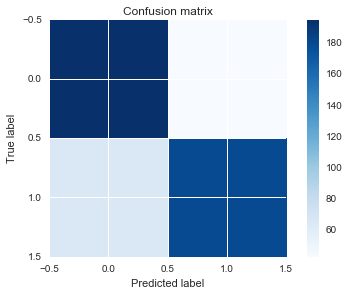

In [32]:
plot_confusion_matrix(cm)

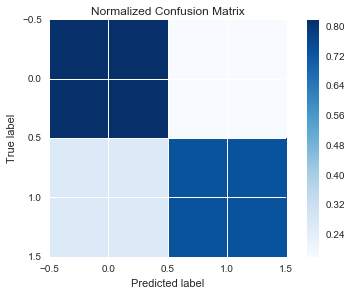

In [33]:
plot_confusion_matrix(normalized_cm, title = "Normalized Confusion Matrix")

### Summary

Fitting Logistic regression to Ridge increased its' accuracy. In Ridge, the coefficients of the linear transformation are normally distributed. In Lasso they are Laplace distributed. Generally, when you have many small/medium sized effects you should go with ridge. If you have only a few variables with a medium/large effect, go with lasso, as demonstrated above. 

Also, based on the Roc Curve and Confusion Matrices, we are able to determine whether a chemical causes a disease based on the words from the abstracts on PubMed and the other words that were in the original dataset. 